In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import preprocessing

In [3]:
# Data preparation
df = pd.read_csv('model_data_pi.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.iloc[:138,:]

In [4]:
labels = ['PM2.5_pi', 'PM10_pi']

In [5]:
header = df.columns

In [6]:
TRAIN_TEST_SPLIT = 0.8
n = int(TRAIN_TEST_SPLIT*df.shape[0])

In [7]:
X_train = df.iloc[:n,:]
X_test = df.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [8]:
X_train

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5
0,17.625000,30.933333,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,...,4.840833,10.010000,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561
1,13.990000,35.770000,3.787000,6.641000,9.477000,8.209263,17.625000,30.933333,4.365000,9.652500,...,5.140833,7.510833,9.632500,7.421590,13.408333,38.358333,4.840833,10.010000,15.388333,6.924738
2,12.683333,37.733333,4.529167,10.465000,16.762500,8.496304,13.990000,35.770000,3.787000,6.641000,...,3.752500,6.064167,8.284167,6.952755,17.391667,32.191667,5.140833,7.510833,9.632500,7.421590
3,11.616667,40.350000,2.710000,6.040000,9.553333,7.754637,12.683333,37.733333,4.529167,10.465000,...,4.610000,10.042500,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755
4,10.425000,42.900000,3.815000,7.147500,10.535000,6.162207,11.616667,40.350000,2.710000,6.040000,...,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,15.750000,11.269782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,8.600000,58.325000,4.621667,10.125000,15.913333,6.034700,9.316667,54.241667,4.965833,10.541667,...,2.917500,5.516667,8.162500,9.565437,11.318182,42.245455,3.316364,6.218182,9.170000,17.227420
106,8.000000,62.700000,2.994000,6.236000,9.613000,5.760000,8.600000,58.325000,4.621667,10.125000,...,2.699000,5.361000,8.107000,7.100310,10.550000,44.441667,2.917500,5.516667,8.162500,9.565437
107,7.430000,62.450000,2.192000,5.787000,9.666000,6.479999,8.000000,62.700000,2.994000,6.236000,...,5.574167,8.223333,10.615833,8.587338,10.110000,47.870000,2.699000,5.361000,8.107000,7.100310
108,7.430000,62.450000,2.192000,5.787000,9.666000,6.638072,7.430000,62.450000,2.192000,5.787000,...,4.965833,10.541667,16.376667,9.021574,9.883333,50.225000,5.574167,8.223333,10.615833,8.587338


### PM 2.5

In [9]:
input_layer = Input(shape=(X_train.shape[1],))
rnn_layer = tf.keras.layers.SimpleRNN(128)
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

rnn_model = Model(inputs=input_layer, outputs=output)
rnn_model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [10]:
history = rnn_model.fit(X_train, y_train1, batch_size=1, epochs=100, verbose=0, validation_split=0)

In [11]:
y_pred1 = rnn_model.predict(X_test)
print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  12.374114318412465
MAE:  2.706939515927138


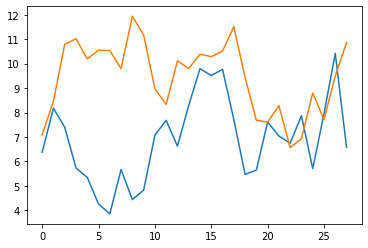

In [12]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

### PM 10

In [13]:
input_layer = Input(shape=(X_train.shape[1],))
rnn_layer = tf.keras.layers.SimpleRNN(128)
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [14]:
history2 = rnn_model.fit(X_train, y_train2, batch_size=1, epochs=100, verbose=0, validation_split=0)

In [15]:
y_pred2 = rnn_model.predict(X_test)
print("MSE: ", mean_squared_error(y_true2, y_pred2))
print("MAE: ", mean_absolute_error(y_true2, y_pred2))

MSE:  60.44166015853185
MAE:  5.650717910529903


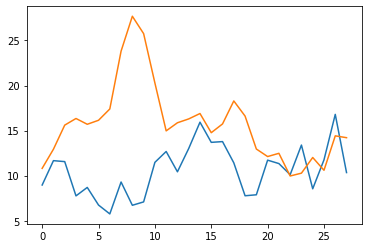

In [16]:
plt.plot(np.arange(len(y_true2)), y_true2)
plt.plot(np.arange(len(y_pred2)), y_pred2)
plt.show()